## Citi Day Data 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="whitegrid")

In [54]:
city_day = pd.read_csv('city_day.csv')
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [55]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [56]:
city_day.describe

<bound method NDFrame.describe of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  

In [57]:
city_day.shape

(29531, 16)

In [58]:
city_day.size

472496

In [59]:
city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [60]:
# Group by 'City' and fill missing values accordingly

# Fill numeric columns with city-wise mean
for col in city_day.select_dtypes(include=np.number).columns:
    city_day[col] = city_day.groupby('City')[col].transform(lambda x: x.fillna(x.mean()))
""
# Fill categorical columns with city-wise mode
for col in city_day.select_dtypes(include='object').columns:
    city_day[col] = city_day.groupby('City')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))



In [40]:
city_day.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [41]:
# Parse date column into datetime format
city_day['Date'] = pd.to_datetime(city_day['Date'])
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

In [42]:
# Create a new column for AQI category
city_day['AQI_Category'] = pd.cut(city_day['AQI'], bins=[0, 50, 100, 200, 300, 400, 500], labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'])
city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_Category
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,Unhealthy for Sensitive Groups
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,Unhealthy for Sensitive Groups
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate,Unhealthy for Sensitive Groups
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate,Unhealthy for Sensitive Groups
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate,Unhealthy for Sensitive Groups
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,Moderate
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,Moderate
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,Moderate


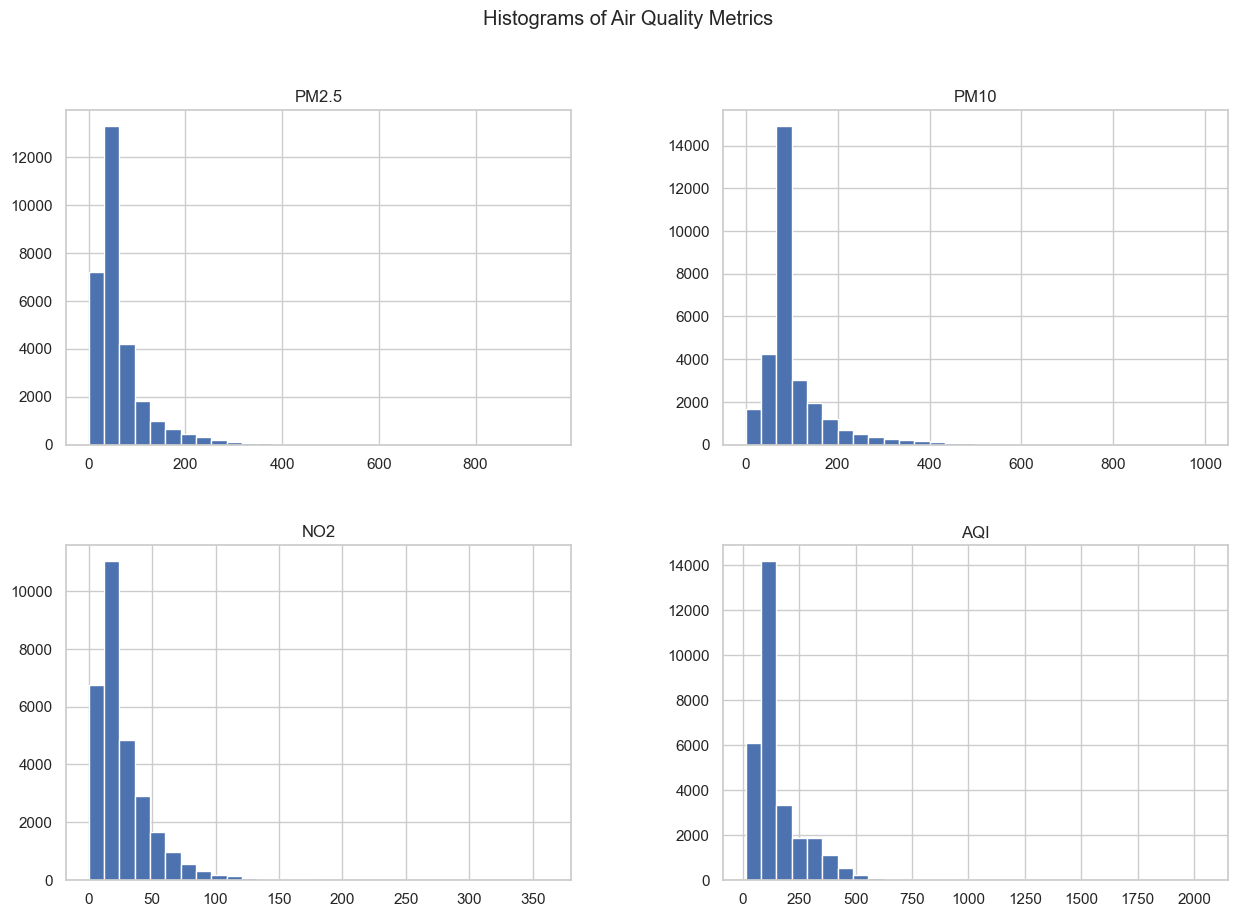

In [43]:
# Plot distributions of numeric columns using histograms
city_day[['PM2.5', 'PM10', 'NO2', 'AQI']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Air Quality Metrics')
plt.show()

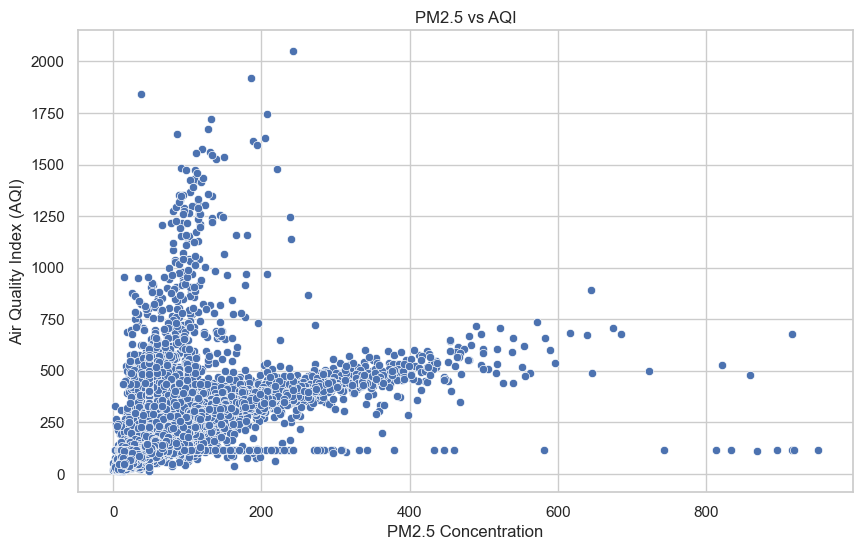

In [44]:
# Explore relationships between columns using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_day, x='PM2.5', y='AQI')
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

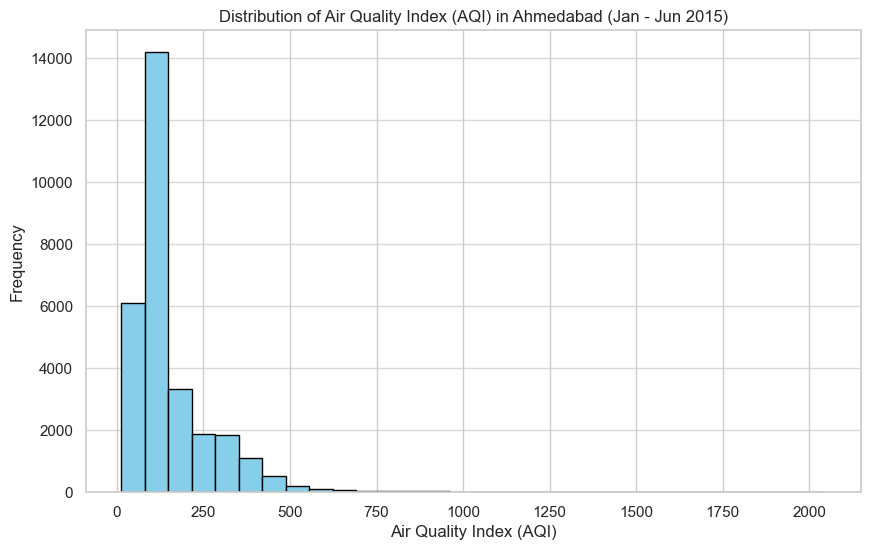

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(city_day['AQI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Air Quality Index (AQI) in Ahmedabad (Jan - Jun 2015)')
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [46]:
average_aqi = city_day['AQI'].mean()
print(f"Average AQI: {average_aqi}")

Average AQI: 158.78155158985473


In [47]:
max_pm25 = city_day['PM2.5'].max()
print(f"Highest PM2.5 Level: {max_pm25}")

Highest PM2.5 Level: 949.99


In [48]:
aqi_distribution = city_day['AQI_Category'].value_counts()
print(aqi_distribution)

AQI_Category
Unhealthy for Sensitive Groups    13510
Moderate                           8224
Unhealthy                          2781
Very Unhealthy                     2337
Good                               1341
Hazardous                           795
Name: count, dtype: int64


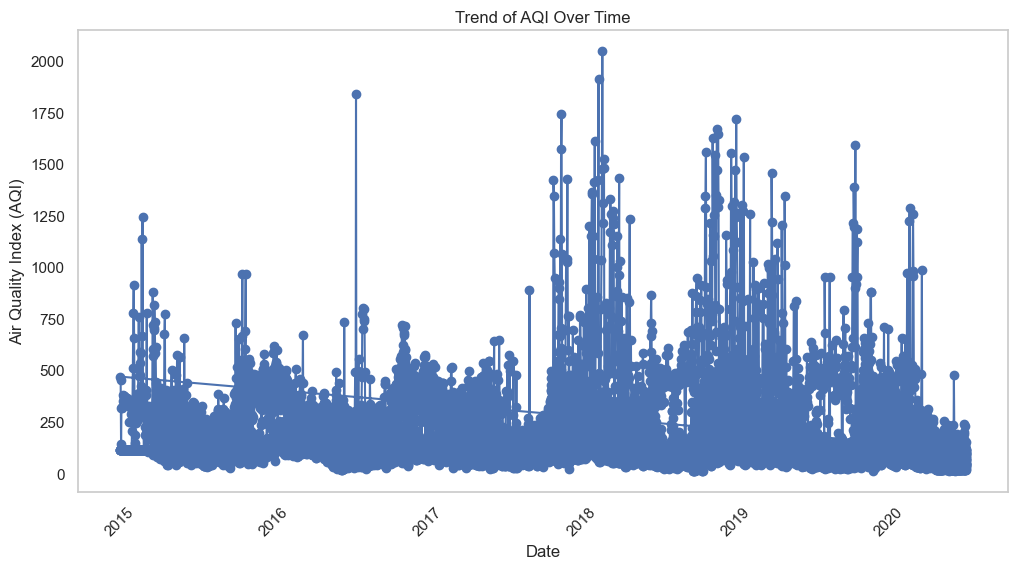

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(city_day['Date'], city_day['AQI'], marker='o')
plt.title('Trend of AQI Over Time')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [64]:
# Identify Worst-hit Cities (Top 10 by mean AQI)
top_cities = city_day.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
top_cities

City
Ahmedabad       452.122939
Delhi           259.487744
Patna           240.782042
Gurugram        225.123882
Lucknow         217.973059
Talcher         172.886819
Jorapokhar      159.251621
Brajrajnagar    150.280505
Kolkata         140.566313
Guwahati        140.111111
Name: AQI, dtype: float64

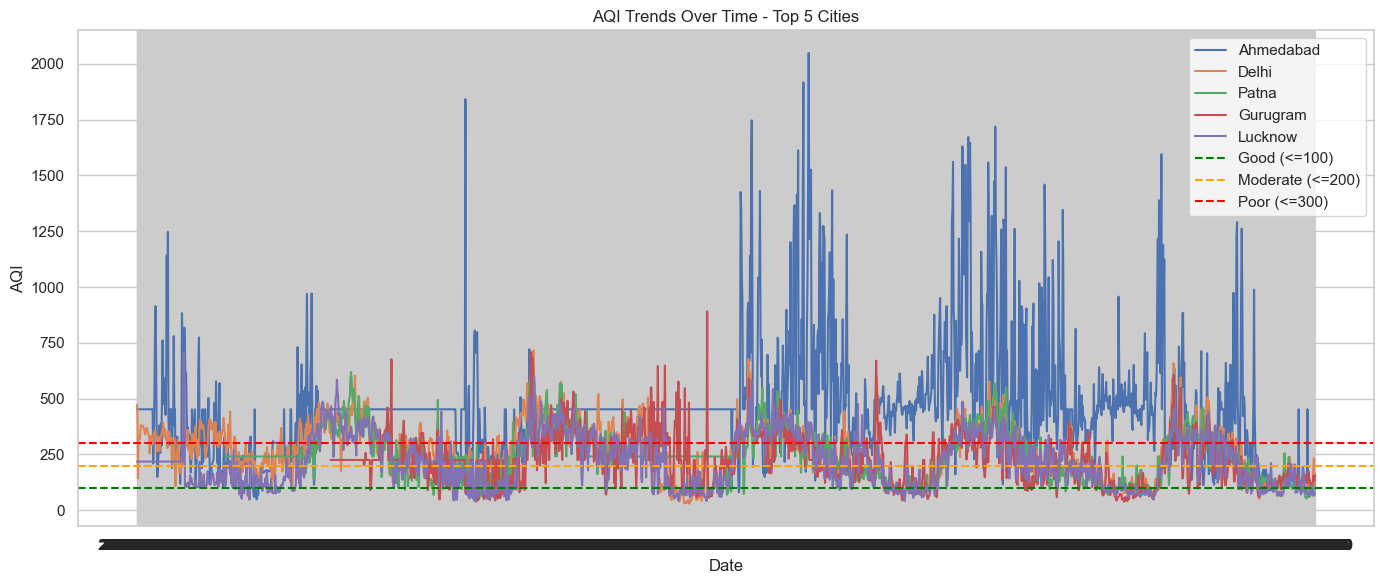

In [66]:
# AQI Trend Line for Top 5 Worst-hit Cities
top_5_cities = top_cities.index[:5]

plt.figure(figsize=(14, 6))
for city in top_5_cities:
    city_df = city_day[city_day['City'] == city].groupby('Date')['AQI'].mean()
    plt.plot(city_df, label=city)

plt.axhline(100, color='green', linestyle='--', label='Good (<=100)')
plt.axhline(200, color='orange', linestyle='--', label='Moderate (<=200)')
plt.axhline(300, color='red', linestyle='--', label='Poor (<=300)')
plt.title("AQI Trends Over Time - Top 5 Cities")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.tight_layout()
plt.show()


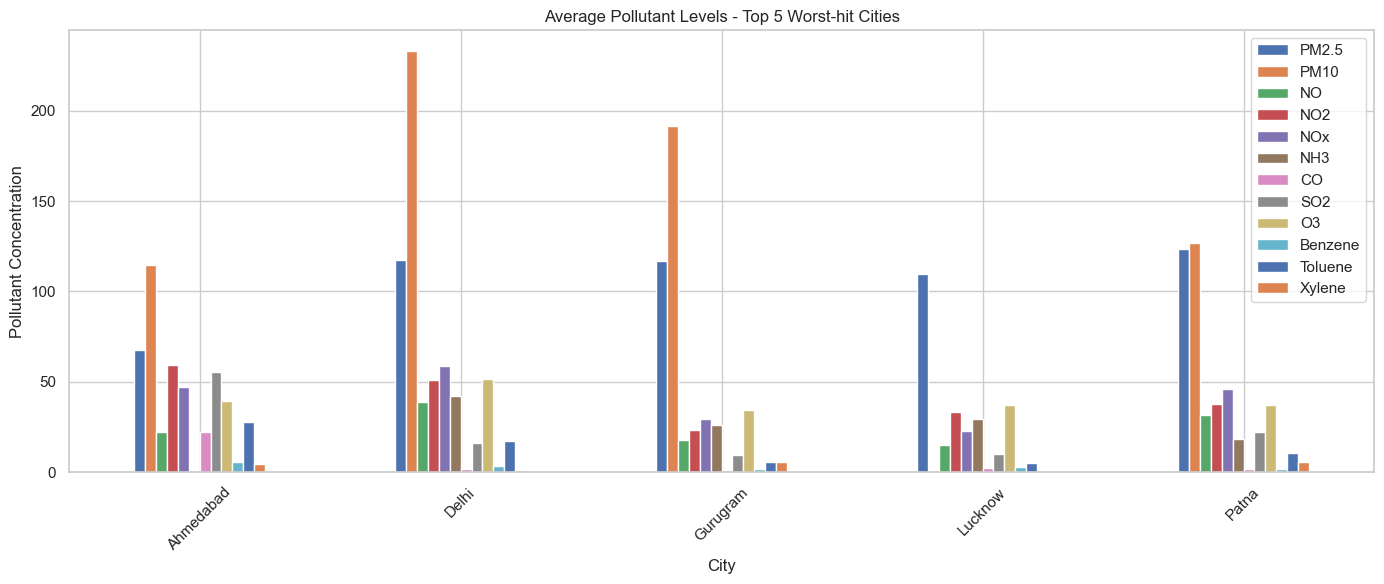

In [67]:
# Bar Plot: Pollutant Levels per City (Top 5)
pollutant_mean = city_day[city_day['City'].isin(top_5_cities)].groupby('City')[pollutants].mean()

pollutant_mean.plot(kind='bar', figsize=(14, 6))
plt.title("Average Pollutant Levels - Top 5 Worst-hit Cities")
plt.ylabel("Pollutant Concentration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
# Summary
print("Top 10 Worst-hit Cities by Mean AQI:\n")
print(top_cities)

print("\nObservation:")
print("- AQI trendlines show seasonal spikes.")
print("- PM2.5 and PM10 are dominant pollutants.")
print("- Major cities like Delhi and Ahmedabad consistently exceed safe AQI levels.")

Top 10 Worst-hit Cities by Mean AQI:

City
Ahmedabad       452.122939
Delhi           259.487744
Patna           240.782042
Gurugram        225.123882
Lucknow         217.973059
Talcher         172.886819
Jorapokhar      159.251621
Brajrajnagar    150.280505
Kolkata         140.566313
Guwahati        140.111111
Name: AQI, dtype: float64

Observation:
- AQI trendlines show seasonal spikes.
- PM2.5 and PM10 are dominant pollutants.
- Major cities like Delhi and Ahmedabad consistently exceed safe AQI levels.
